In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,5

In [2]:
% cd ..

/


In [3]:
% cd content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [ ]:
dataset = pd.read_csv('covid_19_data.csv',  parse_dates=True)
# Parse string to datetime type
dataset['ObservationDate'] = pd.to_datetime(dataset['ObservationDate'], infer_datetime_format=True) 
indexedDataset = dataset.set_index(['ObservationDate'])

In [5]:
from datetime import datetime
indexedDataset.head()

,SNo,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
ObservationDate,,,,,,,
2020-01-22,1,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2020-01-22,2,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2020-01-22,3,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
2020-01-22,4,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2020-01-22,5,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [ ]:
dataset = indexedDataset

In [7]:
dataset.head()

,SNo,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
ObservationDate,,,,,,,
2020-01-22,1,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2020-01-22,2,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2020-01-22,3,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
2020-01-22,4,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2020-01-22,5,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


**Preprocessing data**

In [8]:
# Checking for missing values
dataset.isnull().sum()[dataset.isnull().sum()>0]

Province/State    11463
dtype: int64

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22189 entries, 2020-01-22 to 2020-05-06
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SNo             22189 non-null  int64  
 1   Province/State  10726 non-null  object 
 2   Country/Region  22189 non-null  object 
 3   Last Update     22189 non-null  object 
 4   Confirmed       22189 non-null  float64
 5   Deaths          22189 non-null  float64
 6   Recovered       22189 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 1.4+ MB


In [ ]:
dataset['currentCase'] = dataset['Confirmed'] - dataset['Recovered'] - dataset['Deaths']

In [11]:
dataset.head()

,SNo,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,currentCase
ObservationDate,,,,,,,,
2020-01-22,1,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,1.0
2020-01-22,2,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,14.0
2020-01-22,3,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0,6.0
2020-01-22,4,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,1.0
2020-01-22,5,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,0.0


In [ ]:
case_study_query = dataset[dataset['Country/Region'] == 'Nigeria']
case_study_df = case_study_query[['Confirmed', 'Deaths', 'Recovered','currentCase']]
#case_study_df = case_study_query[['ObservationDate', 'Confirmed', 'Deaths', 'Recovered','currentCase']]

In [13]:
case_study_df.head()

,Confirmed,Deaths,Recovered,currentCase
ObservationDate,,,,
2020-02-28,1.0,0.0,0.0,1.0
2020-02-29,1.0,0.0,0.0,1.0
2020-03-01,1.0,0.0,0.0,1.0
2020-03-02,1.0,0.0,0.0,1.0
2020-03-03,1.0,0.0,0.0,1.0


NameError: ignored

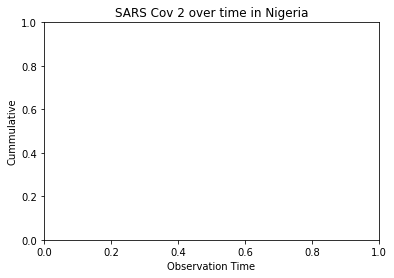

In [14]:
plt.xlabel('Observation Time')
plt.ylabel('Cummulative')
plt.title('SARS Cov 2 over time in Nigeria')
handles, labels = plt.get_legend_handles_labels()
plt.legend(handles, labels)
plt.plot(case_study_df);

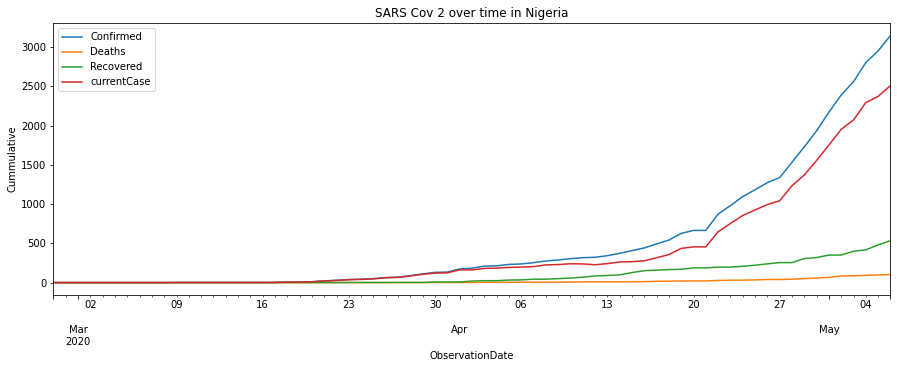

In [32]:

case_study_df =  case_study_df.reset_index()
case_study_df.plot(x='ObservationDate',figsize=(15,5), title='SARS Cov 2 over time in Nigeria')
plt.ylabel('Cummulative')
plt.savefig('SARS Cov 2 over time in Nigeria.png')

In [17]:
#Determining rolling statistics
rol_mean = case_study_df.rolling(window=365).mean()
rol_std = case_study_df.rolling(window=365).std()
print(rol_mean, rol_std)

                 Confirmed  Deaths  Recovered  currentCase
ObservationDate                                           
2020-02-28             NaN     NaN        NaN          NaN
2020-02-29             NaN     NaN        NaN          NaN
2020-03-01             NaN     NaN        NaN          NaN
2020-03-02             NaN     NaN        NaN          NaN
2020-03-03             NaN     NaN        NaN          NaN
...                    ...     ...        ...          ...
2020-05-02             NaN     NaN        NaN          NaN
2020-05-03             NaN     NaN        NaN          NaN
2020-05-04             NaN     NaN        NaN          NaN
2020-05-05             NaN     NaN        NaN          NaN
2020-05-06             NaN     NaN        NaN          NaN

[69 rows x 4 columns]                  Confirmed  Deaths  Recovered  currentCase
ObservationDate                                           
2020-02-28             NaN     NaN        NaN          NaN
2020-02-29             NaN     Na

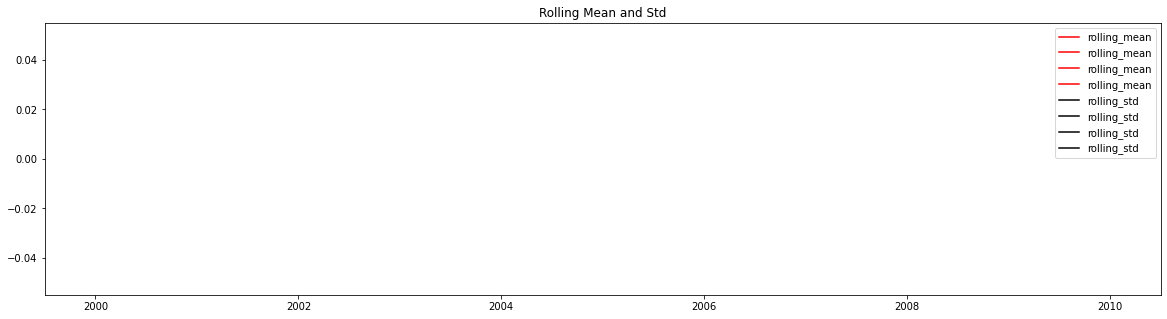

In [19]:
orig = plt.plot(case_study_df, color='blue', label= 'orginal')
mean =  plt.plot(rol_mean, color= 'red', label='rolling_mean')
std =  plt.plot(rol_std, color= 'black', label='rolling_std')
plt.legend(loc='best')
plt.title('Rolling Mean and Std')
plt.show(block=False)

In [15]:
!pip install statsmodels --upgrade

Requirement already up-to-date: statsmodels in /usr/local/lib/python3.6/dist-packages (0.11.1)


In [ ]:
# Using ACDF
from statsmodels.tsa.stattools import adfuller

In [19]:
print('Results of Dickey-Fuller test')
dftest = adfuller(case_study_df[['Confirmed', 'Deaths', 'Recovered','currentCase']], autolag="AIC")

dfoutput = pd.series(dftest[0:4], index=['Test statistics', 'p_value', '#lags used', '# of observation used'])
for key, value in dftest[4].items():
  dfoutput['Critical value'%key] = p_value

print(dfoutput)

Results of Dickey-Fuller test


ValueError: ignored

In [ ]:
daily = case_study_df[case_study_df.ObservationDate == case_study_df.ObservationDate.max()]
daily_data = daily.drop(columns='ObservationDate').copy()

In [14]:
daily

,ObservationDate,Confirmed,Deaths,Recovered,currentCase
21987,05/06/2020,3145.0,103.0,534.0,2508.0


In [15]:
daily_data

,Confirmed,Deaths,Recovered,currentCase
21987,3145.0,103.0,534.0,2508.0


In [ ]:
x = daily_data.drop(columns='Confirmed')

In [17]:
case_study_df.corr()

,Confirmed,Deaths,Recovered,currentCase
Confirmed,1.000000,0.997238,0.979208,0.999097
Deaths,0.997238,1.000000,0.976053,0.996206
Recovered,0.979208,0.976053,1.000000,0.969728
currentCase,0.999097,0.996206,0.969728,1.000000


In [18]:
case_study_df.sescribe()

AttributeError: ignored